 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [10]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [11]:
# Reading whale returns
whale_csv_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_csv_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale_df.head()

C:\Users\ingri\AppData\Local\Temp\ipykernel_13448\52228104.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whale_df = pd.read_csv(whale_csv_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [13]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [14]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [16]:
# Reading algorithmic returns
algo_path= Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_df.head()

C:\Users\ingri\AppData\Local\Temp\ipykernel_13448\1493850826.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algo_df = pd.read_csv(algo_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [18]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [19]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [22]:
# Reading S&P 500 Closing Prices
sp500_path= Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col = "Date" , infer_datetime_format = True, parse_dates = True)
sp500_df.head()

C:\Users\ingri\AppData\Local\Temp\ipykernel_13448\2603589570.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sp500_df = pd.read_csv(sp500_path, index_col = "Date" , infer_datetime_format = True, parse_dates = True)
C:\Users\ingri\AppData\Local\Temp\ipykernel_13448\2603589570.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_path, index_col = "Date" , infer_datetime_format = True, parse_dates = True)


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [23]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [25]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace("$","")
sp500_df['Close'] = sp500_df['Close'].astype("float")
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [26]:
# Calculate Daily Returns
sp500_df = sp500_df.sort_index()
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [28]:
# Dropsp500_returns.isnull().sum()
sp500_returns.isnull().sum()
sp500_returns = sp500_returns.dropna()
sp500_returns.head()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [29]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns = {"Close": "SP500_Daily_Close"})
sp500_returns.head()

,SP500_Daily_Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [30]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df,algo_df,sp500_returns], axis = "columns", join = "inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Combined Daily Returns'}, xlabel='Date'>

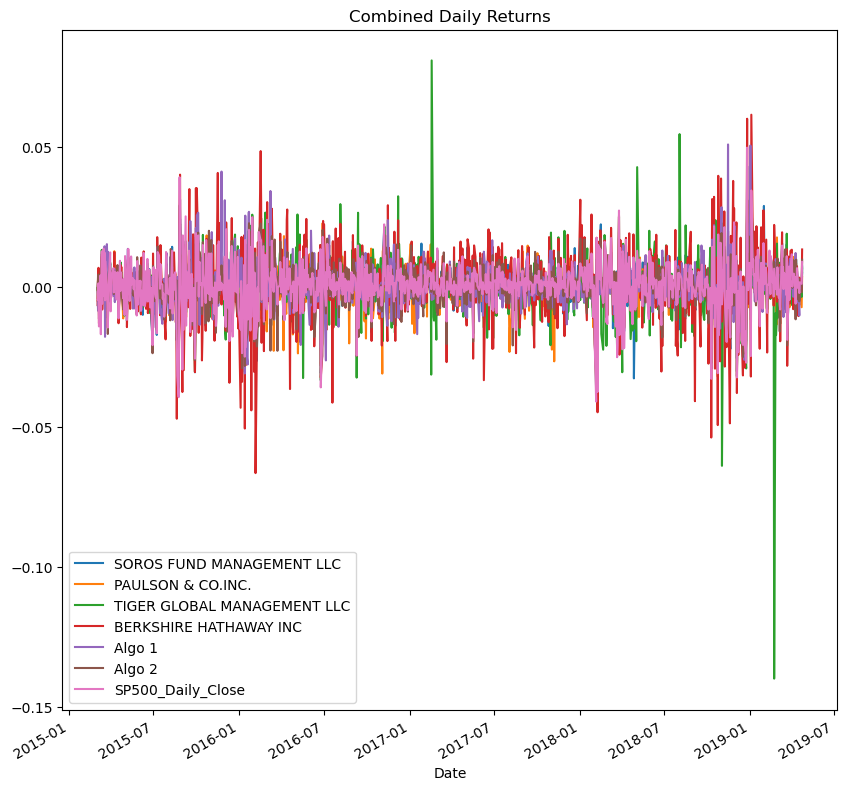

In [32]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (10,10), title = "Combined Daily Returns")

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Combined Cummulative Returns'}, xlabel='Date'>

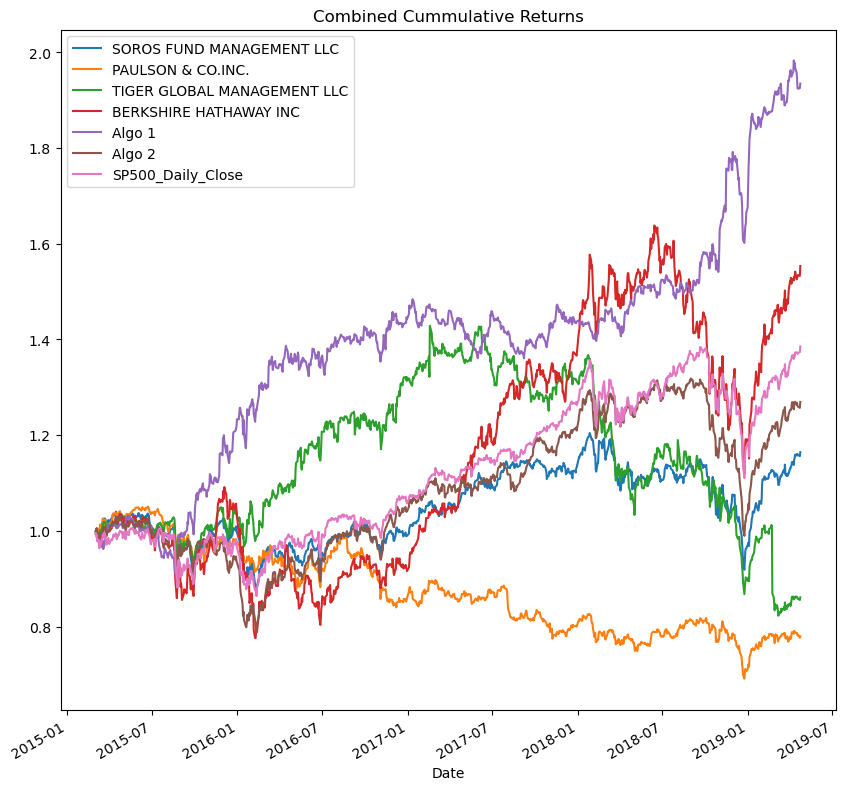

In [34]:
# Calculate cumulative returns of all portfolios
combined_cum_returns = (1 + combined_df).cumprod()
combined_cum_returns.head()
# Plot cumulative returns
combined_cum_returns.plot(figsize = (10,10), title = "Combined Cummulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: title={'center': 'Combined Box Plot for Portfolio'}>

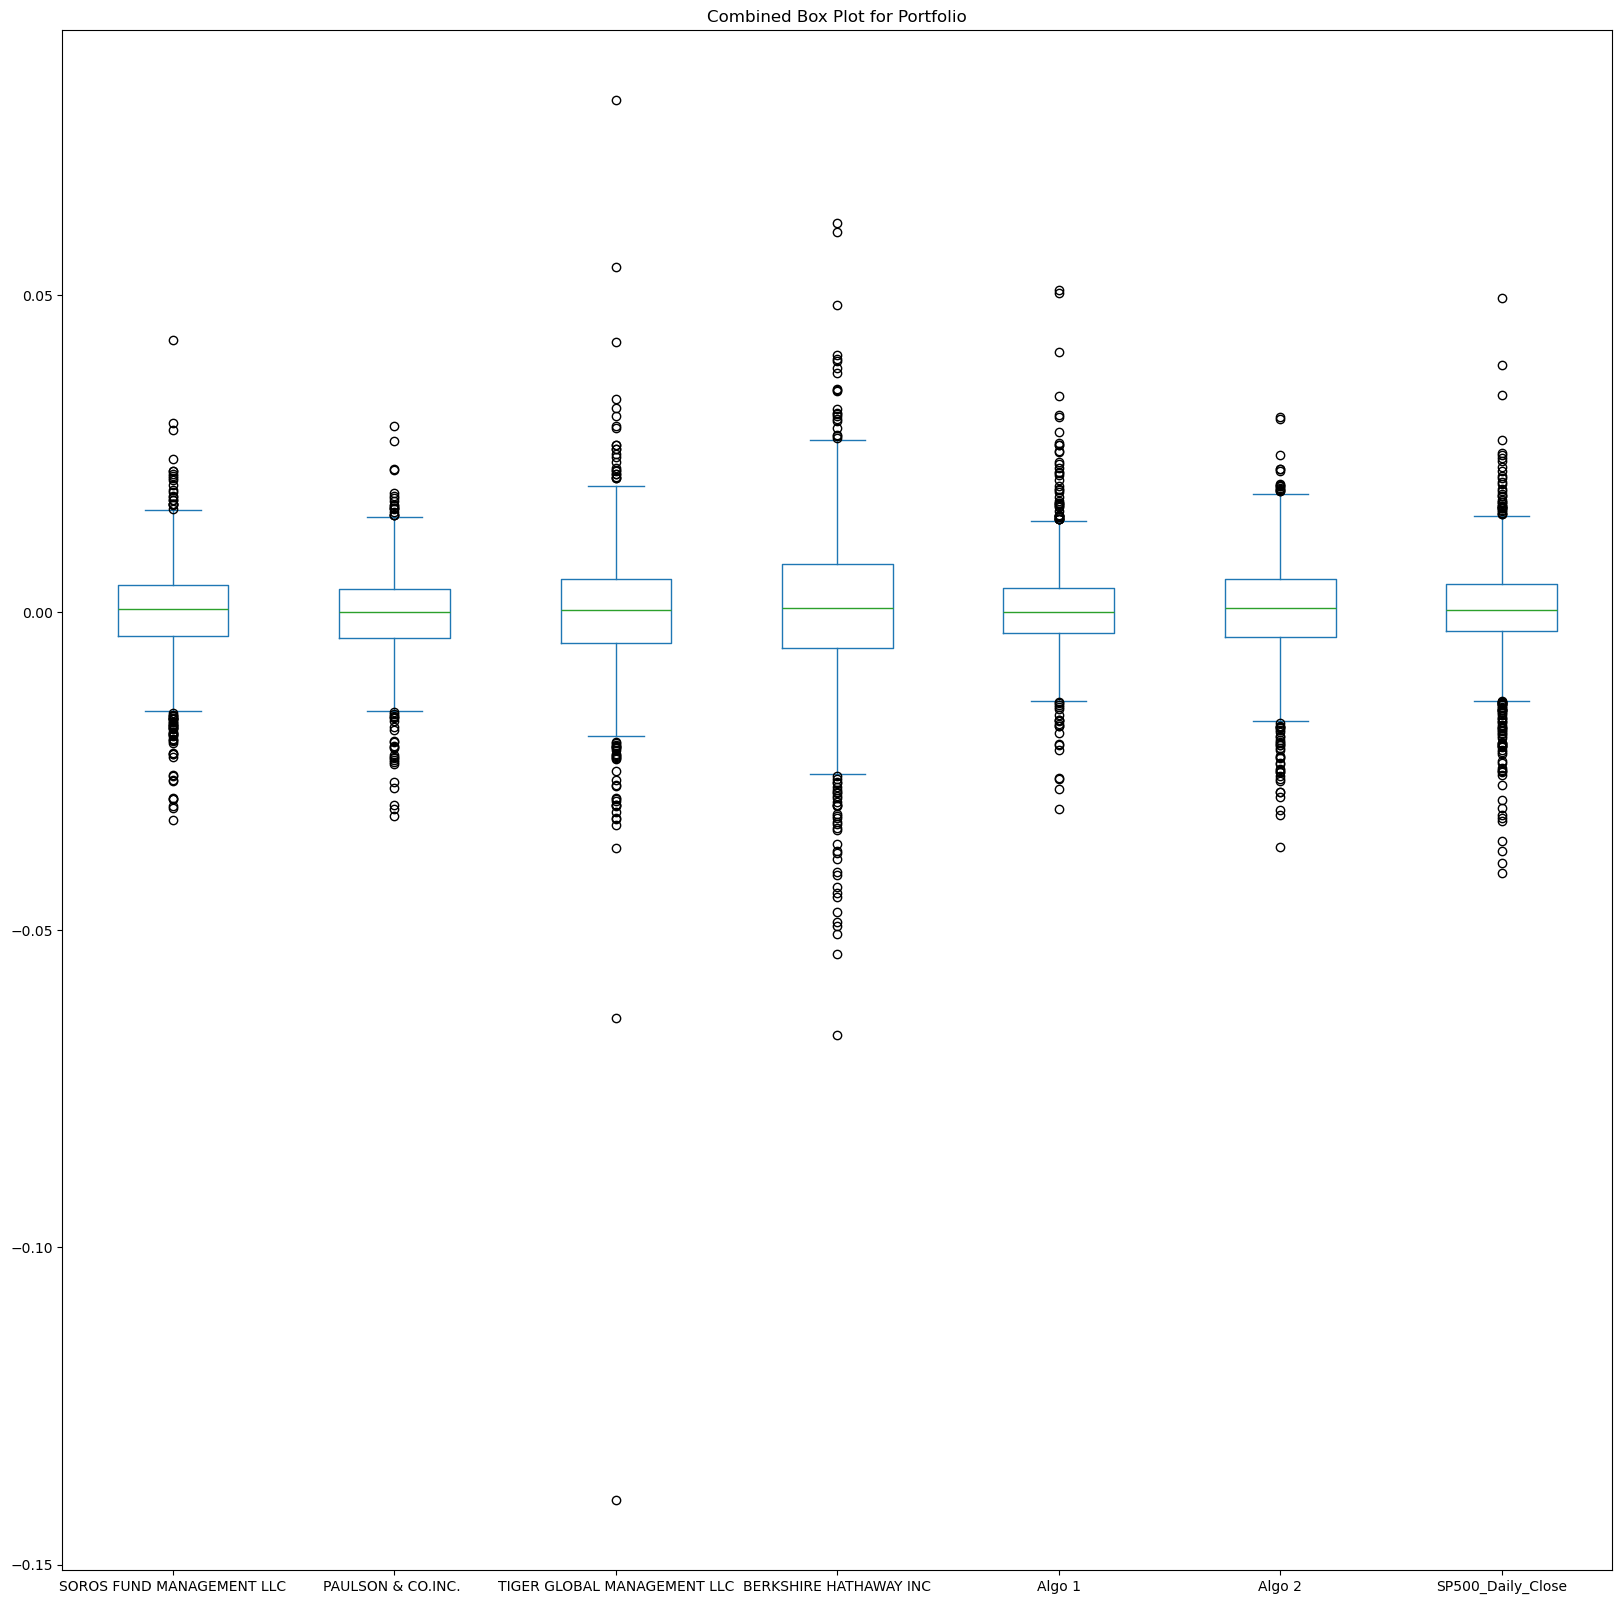

In [36]:
# Box plot to visually show risk
combined_df.plot(kind="box", figsize = (20,20), title = "Combined Box Plot for Portfolio")

### Calculate Standard Deviations

In [37]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500_Daily_Close              0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [ ]:
# Calculate  the daily standard deviation of S&P 500
combined_df["SP500_Daily_Returns"].std()
# Determine which portfolios are riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized standard deviation (252 trading days)
combined_annual_std = combined_std* np.sqrt(252)
combined_annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500_Daily_Close              0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': 'Combined Rolling Standard Deviations 21-Day'}, xlabel='Date'>

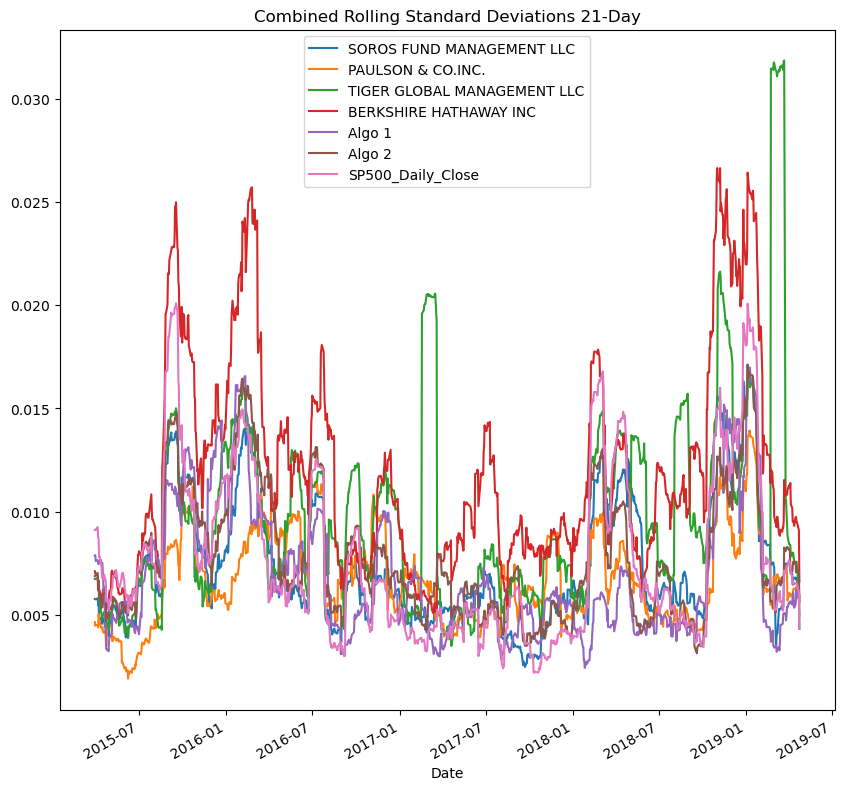

In [40]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_rolling_std = combined_df.rolling(window = 21).std()
# Plot the rolling standard deviation
combined_rolling_std.plot(figsize = (10,10), title = "Combined Rolling Standard Deviations 21-Day")

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: title={'center': 'Beta Trend between Algo2 and SP500'}, xlabel='Date'>

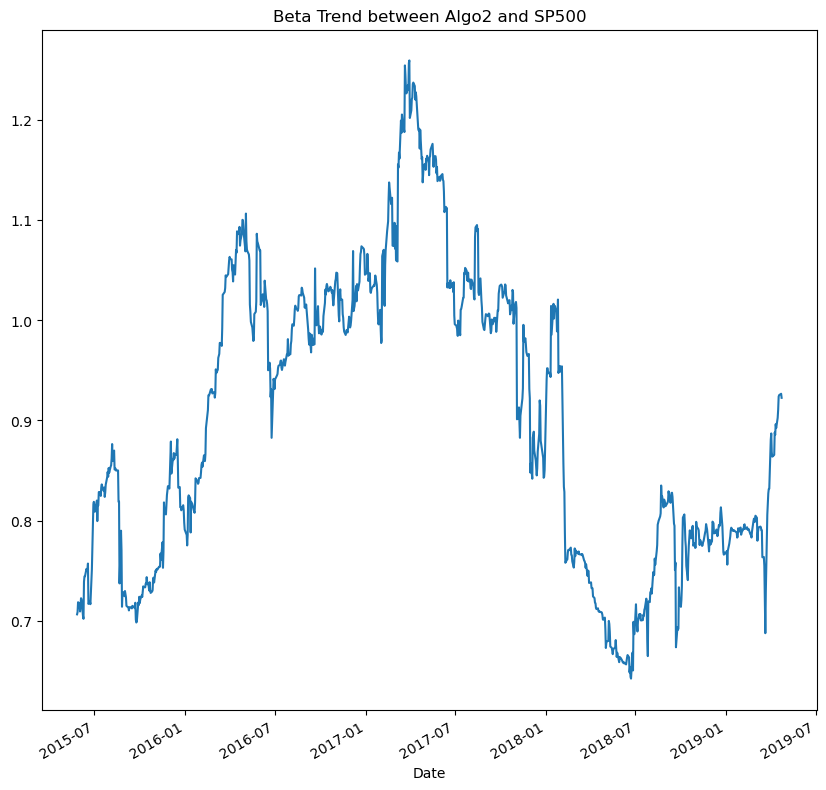

In [42]:
# Calculate covariance of a single portfolio
cov_algotwo = combined_df["Algo 2"].cov(combined_df["SP500_Daily_Close"])
# Calculate variance of S&P 500
var_sp500 = combined_df["SP500_Daily_Close"].var()
# Computing beta
beta = (cov_algotwo / var_sp500)
# Plot beta trend
cov_algotwo_rolling = combined_df["Algo 2"].rolling(window = 60).cov(combined_df["SP500_Daily_Close"])
var_sp500_rolling = combined_df["SP500_Daily_Close"].rolling(window = 60).var()
beta_rolling = (cov_algotwo_rolling / var_sp500_rolling)
beta_rolling.plot(figsize = (10,10), title = "Beta Trend between Algo2 and SP500")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<Axes: title={'center': 'EWM'}, xlabel='Date'>

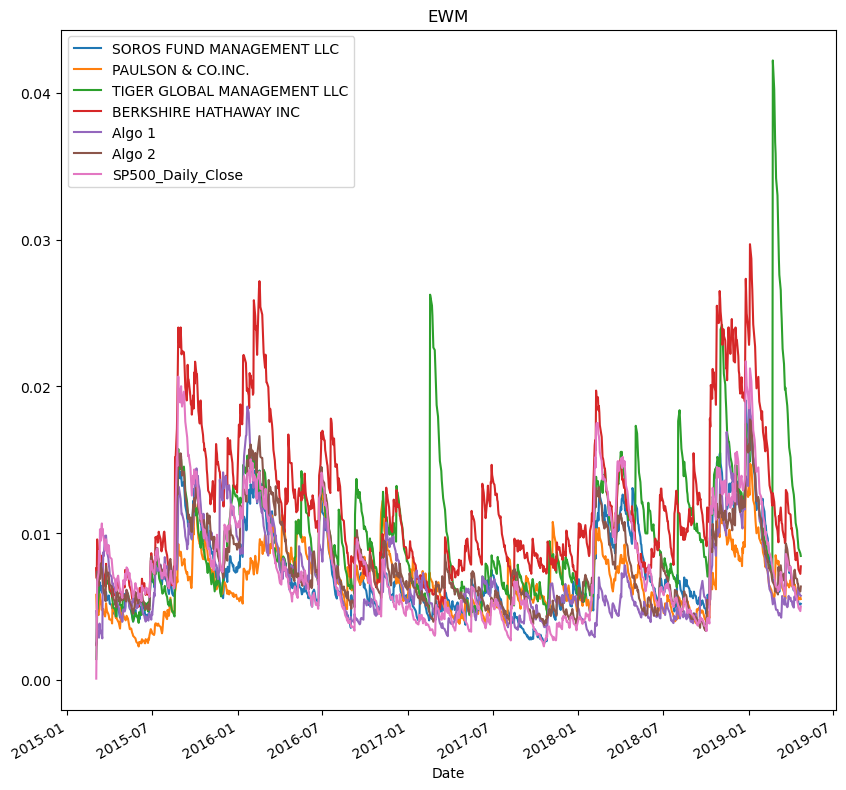

In [43]:
# Use `ewm` to calculate the rolling window
ewm = combined_df.ewm(span = 21).std()
ewm.plot(figsize = (10,10), title = "EWM")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [46]:
# Annualized Sharpe Ratios
annualized_sr = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
annualized_sr

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500_Daily_Close              0.648267
dtype: float64

<Axes: >

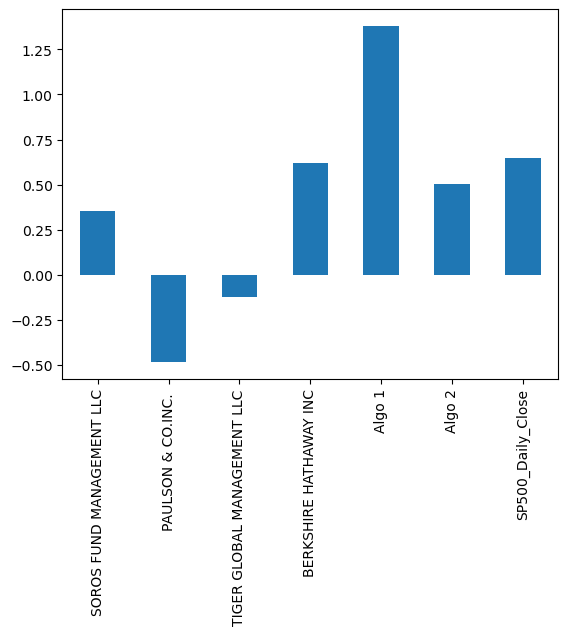

In [47]:
# Visualize the sharpe ratios as a bar plot
annualized_sr.plot(kind = "bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [ ]:
Algo 1 outperformed the market (S&P 500 ) and the Whales Portfolios, however, Algo 2 did not. The annualized sharp ration is .50 while the S&P 500 has a 0.65 and the Berkshire Hathaway Inc has a 0.62 sharp ratio within the Whales Portfolio. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [50]:
# Reading data from 1st stock
goog_path= Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_path, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)
goog_df.head()

C:\Users\ingri\AppData\Local\Temp\ipykernel_13448\1167225314.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  goog_df = pd.read_csv(goog_path, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [52]:
# Reading data from 2nd stock
aapl_path= Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_path, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)
aapl_df.head()

C:\Users\ingri\AppData\Local\Temp\ipykernel_13448\3904788881.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapl_df = pd.read_csv(aapl_path, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [54]:
# Reading data from 3rd stock
cost_path= Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_path, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)
cost_df.head()

C:\Users\ingri\AppData\Local\Temp\ipykernel_13448\2066992181.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  cost_df = pd.read_csv(cost_path, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [55]:
# Combine all stocks in a single DataFrame
new_combined_df = pd.concat([goog_df,aapl_df,cost_df], axis = "rows", join = "inner")
new_combined_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [57]:
# Reset Date index
new_combined_df = new_combined_df.reset_index()
new_combined_df

,Trade DATE,Symbol,NOCP
0,2018-05-11,COST,195.76
1,2018-05-11,GOOG,1098.26
2,2018-05-11,AAPL,188.59
3,2018-05-14,GOOG,1100.20
4,2018-05-14,AAPL,188.15
...,...,...,...
745,2019-05-08,AAPL,202.90
746,2019-05-08,GOOG,1166.27
747,2019-05-09,COST,243.47
748,2019-05-09,AAPL,200.72


In [58]:
# Reorganize portfolio data by having a column per symbol
new_combined_df = new_combined_df.pivot(index = "Trade DATE", columns = "Symbol", values = "NOCP")
new_combined_df

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [59]:
# Calculate daily returns
new_combined_df = new_combined_df.sort_index()
new_combined_returns = new_combined_df.pct_change()
# Drop NAs
new_combined_returns.isnull().sum()
new_combined_returns = new_combined_returns.dropna()
# Display sample data
new_combined_returns

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [60]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
new_combined_weighted_returns_df = new_combined_returns.dot(weights)
# Display sample data
new_combined_weighted_returns_df.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [67]:
# Join your returns DataFrame to the original returns DataFrame
complete_df = pd.concat([combined_df,new_combined_weighted_returns_df,], axis = "columns", join = "inner")
complete_df = complete_df.rename(columns = { 0 : "Gratas's Portfolio"})
complete_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Close,Gratas's Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [68]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# Only compare dates where return data exists for all the stocks (drop NaNs)
complete_df.isnull().sum()
complete_df = complete_df.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [69]:
# Calculate the annualized `std`
complete_df_std = complete_df.std()
complete_df_annual_std = combined_std* np.sqrt(252)
complete_df_annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500_Daily_Close              0.135786
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': 'Complete Rolling Standard Deviations 21 Day'}>

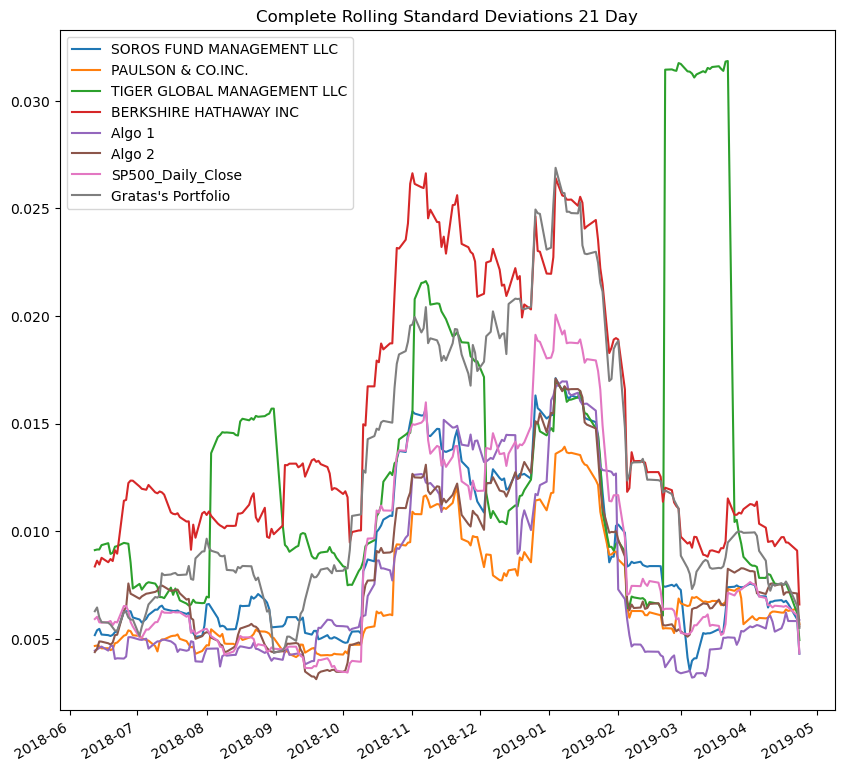

In [70]:
# Calculate rolling standard deviation
complete_rolling_std = complete_df.rolling(window = 21).std()
# Plot rolling standard deviation
complete_rolling_std.plot(figsize = (10,10), title = "Complete Rolling Standard Deviations 21 Day")

### Calculate and plot the correlation

In [71]:
# Calculate and plot the correlation
complete_correlation = complete_df.corr()
complete_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Close,Gratas's Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
SP500_Daily_Close,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Gratas's Portfolio,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': "Beta Trend between Grata's Portfolio and SP500"}>

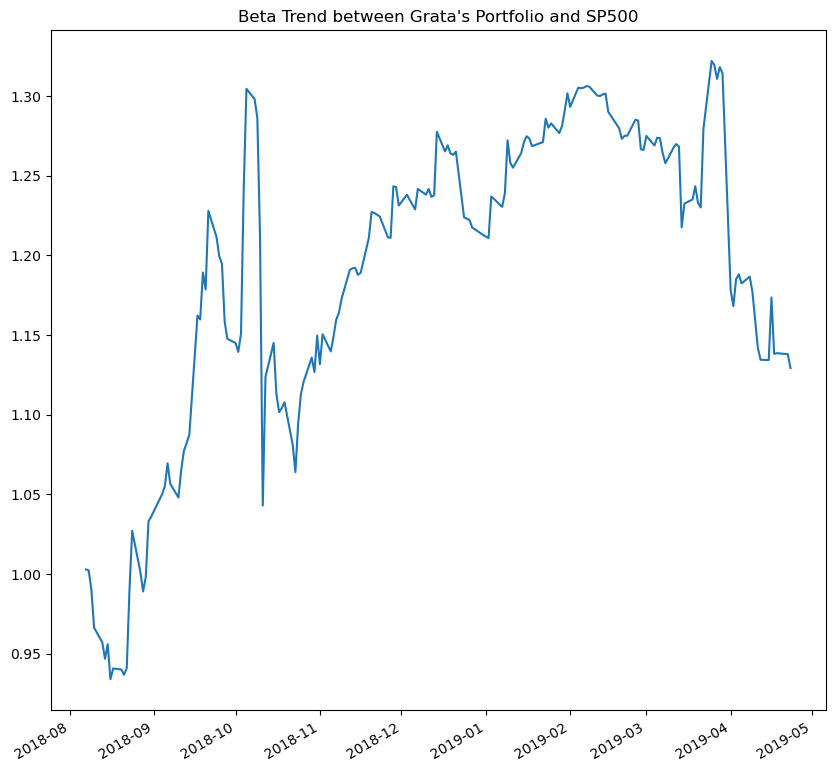

In [72]:
# Calculate and plot Beta
cov_ap_rolling = complete_df["Gratas's Portfolio"].rolling(window = 60).cov(complete_df["SP500_Daily_Close"])
varc_sp500_rolling = complete_df["SP500_Daily_Close"].rolling(window = 60).var()
complete_beta_tolling = (cov_ap_rolling / varc_sp500_rolling)
complete_beta_tolling.plot(figsize = (10,10), title = "Beta Trend between Grata's Portfolio and SP500")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [74]:
# Calculate Annualized Sharpe Ratios
complete_annualized_sr = (complete_df.mean() * 252) / (complete_df.std() * np.sqrt(252))
complete_annualized_sr

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500_Daily_Close              0.584820
Gratas's Portfolio             0.933123
dtype: float64

<Axes: >

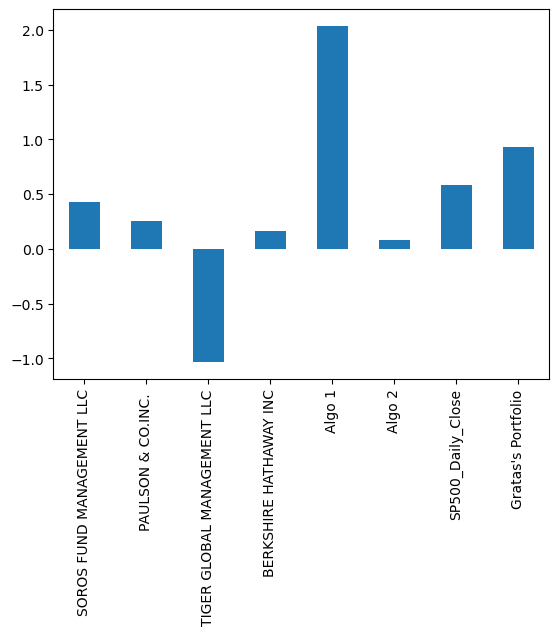

In [75]:
# Visualize the sharpe ratios as a bar plot
complete_annualized_sr.plot(kind = "bar")

### How does your portfolio do?

Write your answer here!

In [ ]:
Grata's Portfolio performs will comparted to the others with the exception of Algo 1 which performs better than Grata's portfolio (2.0 vs 0.9)